In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML
from IPython.display import display
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
file_path= 'https://raw.githubusercontent.com/Mia-Ping/eCommerce_data_analysis_2024/refs/heads/main/eCommerce_data_Jan_2024.csv'
ecom_data = pd.read_csv(file_path)
ecom_data.head()


,date,dateFormatted,session_id,device_category,device_brand,device_os,device_resolution,country,region,city,...,product_id,product_name,product_brand,product_category,product_price,pdp,atc,co,trns,revenue
0,Mon Jan 01 2024 00:00:00 GMT-0800 (Pacific Sta...,2024-01-01,2024-01-01-001,Desktop,Dell,Windows,2560x1440,United States,Michigan,Detroit,...,285,North Face Trail Blazer Durable sleeping bag,North Face,sleeping bag,160,0,0,0,0,0
1,Mon Jan 01 2024 00:00:00 GMT-0800 (Pacific Sta...,2024-01-01,2024-01-01-002,Mobile,Xiaomi,Android,1080x2400,United States,Texas,Houston,...,113,Columbia Peak Seeker Premium camping gear,Columbia,camping gear,226,1,0,0,0,0
2,Mon Jan 01 2024 00:00:00 GMT-0800 (Pacific Sta...,2024-01-01,2024-01-01-003,Mobile,Xiaomi,Android,1440x3200,United States,Ohio,Cincinnati,...,756,Patagonia Canyon Cruiser Lightweight water bottle,Patagonia,water bottle,31,1,0,0,0,0
3,Mon Jan 01 2024 00:00:00 GMT-0800 (Pacific Sta...,2024-01-01,2024-01-01-004,Mobile,Samsung,Android,1080x2400,United States,Colorado,Denver,...,46,Patagonia Mountain Trekker Premium tent,Patagonia,tent,1204,1,0,0,0,0
4,Mon Jan 01 2024 00:00:00 GMT-0800 (Pacific Sta...,2024-01-01,2024-01-01-005,Mobile,Sony,Android,1440x2880,Poland,Łódzkie,Lodz,...,973,Columbia Canyon Cruiser Compact backpack,Columbia,backpack,84,0,0,0,0,0


#Data Cleaning

In [3]:
ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30528 entries, 0 to 30527
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                30528 non-null  object 
 1   dateFormatted       30528 non-null  object 
 2   session_id          30528 non-null  object 
 3   device_category     30528 non-null  object 
 4   device_brand        30528 non-null  object 
 5   device_os           30528 non-null  object 
 6   device_resolution   30528 non-null  object 
 7   country             30528 non-null  object 
 8   region              30528 non-null  object 
 9   city                30528 non-null  object 
 10  city_lat            30528 non-null  float64
 11  city_lon            30528 non-null  float64
 12  marketing_medium    30528 non-null  object 
 13  marketing_source    30528 non-null  object 
 14  marketing_campaign  30528 non-null  object 
 15  product_id          30528 non-null  int64  
 16  prod

In [4]:
# Check for missing values
missing_values = ecom_data.isnull().sum()
missing_values[missing_values>0]


,0


#Step 1: Define Business Goals

To identify why certain products — especially high-interest and high-priced ones — receive significant traffic and marketing effort but fail to generate revenue, and to propose actionable improvements to increase conversions.





#Step 2: Develop Hypotheses and Validate

##A) Cost Reduction Hypotheses

###1. Marketing Efficiency Analysis




---


**Goal: Optimize marketing spend by identifying low-performing paid campaigns and high-value organic channels.**

---

Which marketing sources and campaigns generate the most revenue and transactions?


---


Are paid channels (e.g., CPC, display ads) performing well, or are they too costly?


---


Which organic channels (e.g., direct, email, SEO) bring in high revenue?
Should we reallocate the budget from underperforming paid channels?



In [5]:
marketing_source_analysis = ecom_data.groupby('marketing_source')[["trns",'revenue']].sum()
marketing_source_analysis

,trns,revenue
marketing_source,,
(none),90,38000
bing search,10,3224
cart abandon,18,9057
duck duck go,3,1457
facebook,49,18672
google,223,89107
google search,587,272097
influencer blog,8,2746
instagram,31,14900


**Conclusion**:


1.   Google Search generates the highest revenue ($272,097) and highest transactions (587) → This is a strong performer.

2.   Facebook and Instagram contribute moderate revenue.


3.   Bing Search, DuckDuckGo, and Influencer Blogs contribute low revenue → Potentially inefficient channels.

4.   Weekly Newsletter is performing well for an organic source.








In [6]:
marketing_campaign_analysis = ecom_data.groupby('marketing_campaign')[["trns",'revenue']].sum()
marketing_campaign_analysis

,trns,revenue
marketing_campaign,,
(none),690,314778
affiliate link,23,9846
backlink,3,724
branding,20,8542
competitor products,49,21087
exclusive sale,8,6359
influencer,47,24106
new discounts,21,7572
new for season,43,28546


**Conlusion:**


1.   "None" (Uncategorized traffic) dominates revenue → Likely organic traffic or direct visitors.
2.   "New Products" and "Top Products" campaigns drive strong revenue.
3.   Low-performing campaigns:
"Backlink" and "Reward Points" have almost no contribution.
"New Discounts" has a low impact → Possibly ineffective.









In [7]:
marketing_analysis = ecom_data.groupby(['marketing_source', 'marketing_campaign'])[['revenue', 'trns']].sum().reset_index()
marketing_analysis

,marketing_source,marketing_campaign,revenue,trns
0,(none),(none),38000,90
1,bing search,(none),3224,10
2,cart abandon,personalization - just for you,5882,9
3,cart abandon,preview sale,3175,9
4,duck duck go,(none),1457,3
5,facebook,influencer,9835,26
6,facebook,preview sale,8837,23
7,google,branding,8542,20
8,google,competitor products,21087,49
9,google,new products,23658,68


**Conclusions**


1.   Google Search is by far the top-performing source.
2.   Google (without "search") also contributes significantly through different campaigns:
"Top Products"  performs the best.
"New Products" also contributes well.
"Competitor Products" is strong, likely targeting competitor brand searches.

3.   "Personalization - Just for You" and "Preview Sale" have very low conversions.
4.   Influencer Blog - "New for Season" & "Special Event" → Likely not worth continued investment.
Duck Duck Go → Very low performance

5.   Facebook is doing better than Instagram.






In [8]:
# Calculate revenue per transaction
marketing_analysis['revenue_per_trns'] = marketing_analysis['revenue'] / marketing_analysis['trns']
marketing_analysis.fillna(0, inplace=True)

In [9]:
from IPython.display import display
display(marketing_analysis)

,marketing_source,marketing_campaign,revenue,trns,revenue_per_trns
0,(none),(none),38000,90,422.222222
1,bing search,(none),3224,10,322.400000
2,cart abandon,personalization - just for you,5882,9,653.555556
3,cart abandon,preview sale,3175,9,352.777778
4,duck duck go,(none),1457,3,485.666667
5,facebook,influencer,9835,26,378.269231
6,facebook,preview sale,8837,23,384.217391
7,google,branding,8542,20,427.100000
8,google,competitor products,21087,49,430.346939
9,google,new products,23658,68,347.911765




**Conclusion**: Top Marketing Sources: Instagram - Influencer (698.21) → Best performing influencer campaign 🚀.
Google Search (463.54) → Organic search remains the strongest revenue driver.
Google - Competitor Products (430.35) → Strong campaign targeting competitor brands.
Google - Branding (427.10) → Good brand awareness ROI.
Weekly Newsletter - New for Season (832.90) → Best performing organic campaign!
TikTok - Special Event (1219.67) → Highest value per transaction, but low volume.




**Recommendations from Marketing Efficiency Analysis**
1. Increase investment in Instagram Influencer campaigns (outperforms Facebook).
2. Continue investing in Google Search & Competitor Product campaigns.
3. Expand Weekly Newsletter campaigns (especially "New for Season").
4. Scale TikTok Special Event (target broader audience to increase transactions).








###2.  Product Performance Optimization

**Goal: Optimize product performance by identifying low-converting or underperforming products based on customer interactions and revenue metrics.**





1.  Which products have high page views (PDP) but low transactions?
Customer interest exists, but there are conversion barriers.
2.   Which products have low revenue despite significant page views and marketing efforts?
These may need pricing, targeting, or promotion changes.
3.   Which high-priced products have significant drop-offs at the cart or checkout stages?
Opportunity to optimize funnel or improve value communication.












###1) Identify Products with High PDP Views but Low Revenue

**Objective: Find products with high page views (PDP) but low revenue.**

In [10]:
#Derive Conversion Metrics
ecom_data['pdp_to_atc'] = ecom_data['atc'] / ecom_data['pdp']
ecom_data['atc_to_co'] = ecom_data['co'] / ecom_data['atc']
ecom_data['co_to_trns'] = ecom_data['trns'] / ecom_data['co']
ecom_data['pdp_to_trns'] = ecom_data['trns'] / ecom_data['pdp']
ecom_data['revenue_per_trns'] = ecom_data.apply(
    lambda row: row['revenue'] / row['trns'] if row['trns'] != 0 else 0, axis=1)
ecom_data.fillna(0, inplace=True)
ecom_data.head()

,date,dateFormatted,session_id,device_category,device_brand,device_os,device_resolution,country,region,city,...,pdp,atc,co,trns,revenue,pdp_to_atc,atc_to_co,co_to_trns,pdp_to_trns,revenue_per_trns
0,Mon Jan 01 2024 00:00:00 GMT-0800 (Pacific Sta...,2024-01-01,2024-01-01-001,Desktop,Dell,Windows,2560x1440,United States,Michigan,Detroit,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,Mon Jan 01 2024 00:00:00 GMT-0800 (Pacific Sta...,2024-01-01,2024-01-01-002,Mobile,Xiaomi,Android,1080x2400,United States,Texas,Houston,...,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,Mon Jan 01 2024 00:00:00 GMT-0800 (Pacific Sta...,2024-01-01,2024-01-01-003,Mobile,Xiaomi,Android,1440x3200,United States,Ohio,Cincinnati,...,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,Mon Jan 01 2024 00:00:00 GMT-0800 (Pacific Sta...,2024-01-01,2024-01-01-004,Mobile,Samsung,Android,1080x2400,United States,Colorado,Denver,...,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,Mon Jan 01 2024 00:00:00 GMT-0800 (Pacific Sta...,2024-01-01,2024-01-01-005,Mobile,Sony,Android,1440x2880,Poland,Łódzkie,Lodz,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [11]:
high_pdp_threshold = ecom_data['pdp'].quantile(0.75)
low_trns_threshold = ecom_data['trns'].quantile(0.25)

high_pdp_low_trns = ecom_data[
    (ecom_data['pdp'] >= high_pdp_threshold) &
    (ecom_data['trns'] <= low_trns_threshold)
].copy()

from IPython.display import display
display(high_pdp_low_trns[['product_name', 'product_category', 'pdp', 'trns', 'pdp_to_trns']])


,product_name,product_category,pdp,trns,pdp_to_trns
1,Columbia Peak Seeker Premium camping gear,camping gear,1,0,0.0
2,Patagonia Canyon Cruiser Lightweight water bottle,water bottle,1,0,0.0
3,Patagonia Mountain Trekker Premium tent,tent,1,0,0.0
5,North Face Peak Seeker Premium headlamp,headlamp,1,0,0.0
6,Osprey Nature Voyager Pro outdoor cookware,outdoor cookware,1,0,0.0
...,...,...,...,...,...
30510,Eureka Adventure Quest Waterproof hiking shoes,hiking shoes,1,0,0.0
30513,Osprey River Runner Waterproof water bottle,water bottle,1,0,0.0
30514,Osprey Summit Explorer Lightweight bike,bike,1,0,0.0
30517,Black Diamond Summit Explorer Waterproof outdo...,outdoor clothing,1,0,0.0


In [12]:
#Grouping by Product Category to identify categories with the most high-interest but zero-conversion products.
category_summary = high_pdp_low_trns.groupby('product_category').agg({
    'product_name': 'count',
    'pdp': 'sum'
}).reset_index().sort_values(by='product_name', ascending=False)

category_summary.rename(columns={'product_name': 'num_products'}, inplace=True)
category_summary


,product_category,num_products,pdp
4,hiking shoes,1366,1366
0,backpack,1230,1230
7,sleeping bag,1225,1225
1,bike,1223,1223
2,camping gear,1218,1218
6,outdoor cookware,1197,1197
8,tent,1180,1180
9,water bottle,1073,1073
3,headlamp,988,988
5,outdoor clothing,865,865


Top problematic categories are:

🥇 Hiking shoes (1,366 products)
🥈 Backpacks
🥉 Sleeping bags

These are categories with strong interest but no sales.They should be priority for improvement.






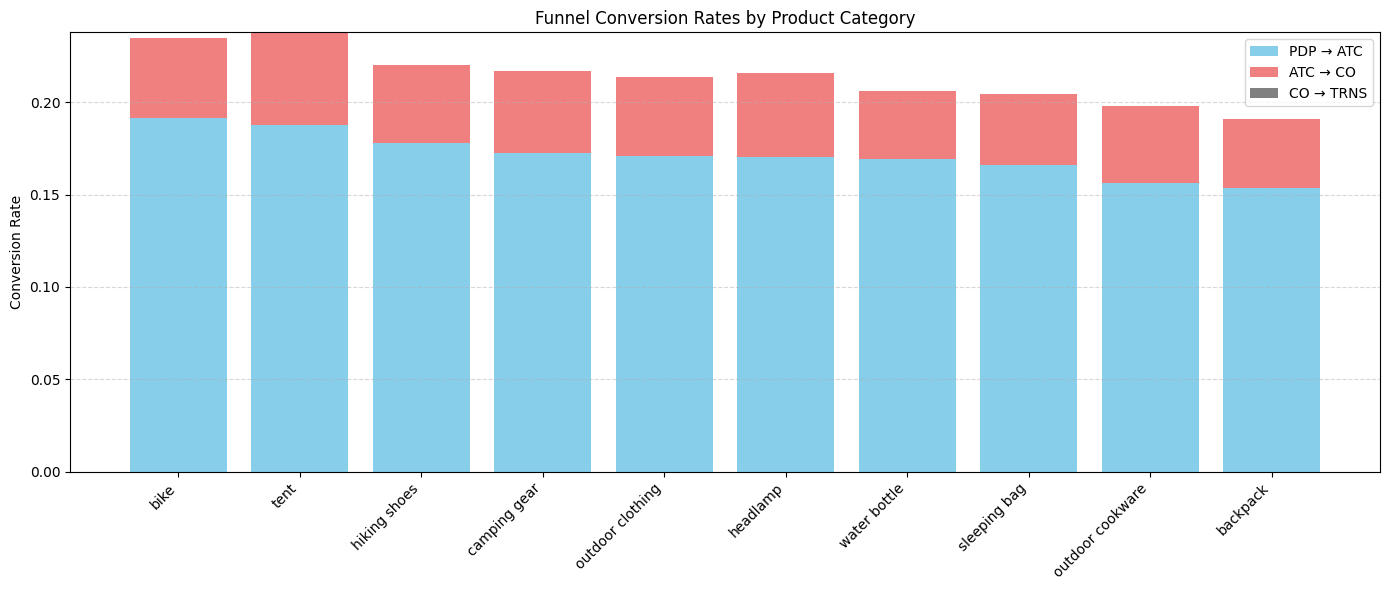

In [26]:
# Group and calculate average funnel conversion per category
category_funnel = high_pdp_low_revenue.groupby('product_category').agg({
    'product_name': 'count',
    'pdp_to_atc': 'mean',
    'atc_to_co': 'mean',
    'co_to_trns': 'mean'
}).reset_index().rename(columns={'product_name': 'num_products'})

# Sort by PDP → ATC to order the chart
category_funnel = category_funnel.sort_values(by='pdp_to_atc', ascending=False)

# Plot
x = np.arange(len(category_funnel['product_category']))
plt.figure(figsize=(14,6))
plt.bar(x, category_funnel['pdp_to_atc'], label='PDP → ATC', color='skyblue')
plt.bar(x, category_funnel['atc_to_co'], bottom=category_funnel['pdp_to_atc'], label='ATC → CO', color='lightcoral')
plt.bar(x, category_funnel['co_to_trns'], bottom=category_funnel['pdp_to_atc'] + category_funnel['atc_to_co'], label='CO → TRNS', color='gray')

plt.xticks(x, category_funnel['product_category'], rotation=45, ha='right')
plt.ylabel('Conversion Rate')
plt.title('Funnel Conversion Rates by Product Category')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Insights:


1.   PDP → ATC rates are decent (~17–19%) across most categories, which means product pages are doing okay at grabbing interest. Top performers: bike, tent, hiking shoes.
2.  ATC → CO is relatively low for all categories (~2–5%).
Suggests that users are hesitant to proceed with checkout after adding to cart.
Likely causes: shipping costs, poor UX, lack of urgency, or payment friction.
3. Users drop off completely at checkout, possibly due to:
Unexpected fees, poor trust signals, or technical bugs.
This stage needs urgent attention.



###2) Identify Products with High PDP Views but Low Revenue Despite Marketing Efforts

**Objective:**
**Find products that receive high customer attention (high PDP views) and marketing exposure but fail to generate sufficient revenue.**

In [13]:
high_pdp_threshold = ecom_data['pdp'].quantile(0.75)       # Top 25% most viewed
low_revenue_threshold = ecom_data['revenue'].quantile(0.25) # Bottom 25% in revenue

high_pdp_low_revenue = ecom_data[
    (ecom_data['pdp'] >= high_pdp_threshold) &
    (ecom_data['revenue'] <= low_revenue_threshold)
].copy()


In [14]:
# Check averages across all 11,565 rows
avg_metrics = high_pdp_low_revenue[['pdp_to_atc', 'atc_to_co', 'co_to_trns']].mean()
print(avg_metrics)


pdp_to_atc    0.173454
atc_to_co     0.042802
co_to_trns    0.000000
dtype: float64


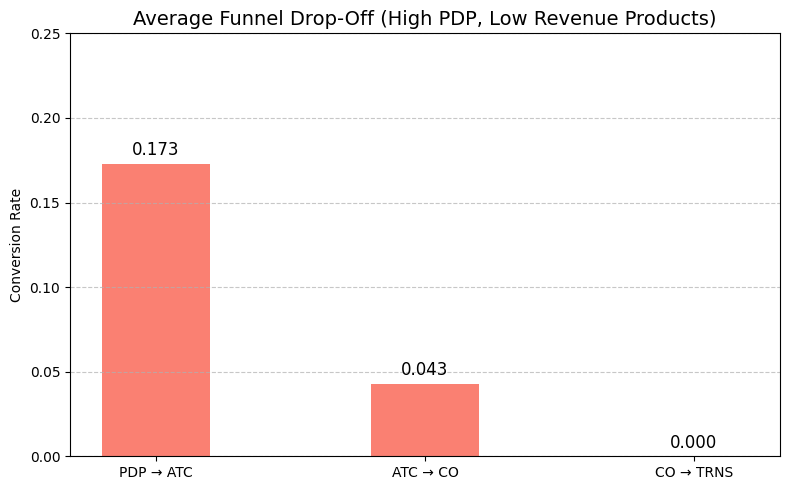

In [23]:
# Average conversion rates across funnel stages
avg_funnel = {
    'PDP → ATC': 0.173,
    'ATC → CO': 0.043,
    'CO → TRNS': 0.0
}

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(avg_funnel.keys(), avg_funnel.values(), width=0.4, color='salmon')
plt.title("Average Funnel Drop-Off (High PDP, Low Revenue Products)", fontsize=14)
plt.ylabel("Conversion Rate")
plt.ylim(0, 0.25)
for i, val in enumerate(avg_funnel.values()):
    plt.text(i, val + 0.005, f"{val:.3f}", ha='center', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Insights:
1.   pdp_to_atc: 17.3% A decent portion of users add to cart — there's interest.
Product page + pricing gets attention ✅
2.   atc_to_co:  4.3%  Huge drop — most users do not proceed to checkout.
Friction, hesitation, or hidden costs ⚠️
3.   co_to_trns: 0% 	Nobody completes the purchase. Checkout issues, price shock, trust concerns 🚨








**Goal: Identify which sources are driving high PDP views but resulting in no revenue (wasted effort or bad targeting)**

In [15]:
# Group underperformers by marketing source
marketing_summary = high_pdp_low_revenue.groupby('marketing_source').agg({
    'product_name': 'count',
    'pdp': 'sum',
    'revenue': 'sum',
    'trns': 'sum',
    'pdp_to_atc': 'mean',
    'atc_to_co': 'mean',
    'co_to_trns': 'mean'
}).reset_index().sort_values(by='product_name', ascending=False)

marketing_summary.rename(columns={'product_name': 'num_products'}, inplace=True)

display(marketing_summary)


,marketing_source,num_products,pdp,revenue,trns,pdp_to_atc,atc_to_co,co_to_trns
6,google search,3881,3881,0,0,0.184746,0.055140,0.0
5,google,1553,1553,0,0,0.176433,0.050869,0.0
4,facebook,1361,1361,0,0,0.153564,0.019104,0.0
8,instagram,1064,1064,0,0,0.170113,0.027256,0.0
12,weekly newsletter,801,801,0,0,0.163546,0.041199,0.0
0,(none),747,747,0,0,0.194110,0.066934,0.0
2,cart abandon,425,425,0,0,0.183529,0.030588,0.0
11,tiktok,368,368,0,0,0.138587,0.013587,0.0
10,partner website,330,330,0,0,0.166667,0.057576,0.0
1,bing search,281,281,0,0,0.163701,0.032028,0.0


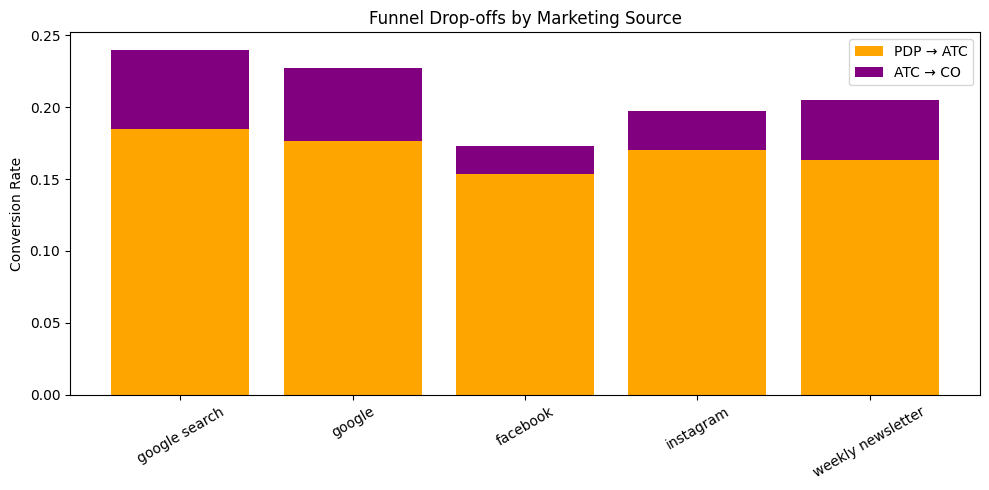

In [24]:
# Top 5 marketing sources by number of products
top_sources = marketing_summary.sort_values('num_products', ascending=False).head(5)

# Plot PDP → ATC rates for these
plt.figure(figsize=(10,5))
plt.bar(top_sources['marketing_source'], top_sources['pdp_to_atc'], label='PDP → ATC', color='orange')
plt.bar(top_sources['marketing_source'], top_sources['atc_to_co'], label='ATC → CO', bottom=top_sources['pdp_to_atc'], color='purple')
plt.title("Funnel Drop-offs by Marketing Source")
plt.ylabel("Conversion Rate")
plt.legend()
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Insights:
1. Google search, facebook, instagram, and weekly newsletter are bringing thousands of views (PDPs), but not a single conversion.
These channels are burning ad dollars or wasting exposure without generating revenue.
2. Average pdp_to_atc is fairly decent (~15–19%) but atc_to_co is very low (mostly < 7%). co_to_trns is zero across the board.
3. Marketing-Product Mismatch or Checkout Friction: These sources are attracting unqualified traffic (wrong audience, bad ad targeting), OR
There’s friction in the checkout process (e.g., price shock, trust issues, payment failure, shipping cost)


**Goal: See if higher-priced products are disproportionately underperforming**

In [16]:
# Define price bins
ecom_data['price_group'] = pd.cut(
    ecom_data['product_price'],
    bins=[0, 100, 300, 600, 1000, float('inf')],
    labels=['$0–100', '$101–300', '$301–600', '$601–1000', '$1000+']
)

# Merge price group back to filtered data
high_pdp_low_revenue = high_pdp_low_revenue.merge(
    ecom_data[['product_name', 'price_group']],
    on='product_name',
    how='left'
)

# Group by price group
price_summary = high_pdp_low_revenue.groupby('price_group').agg({
    'product_name': 'count',
    'pdp_to_atc': 'mean',
    'atc_to_co': 'mean',
    'co_to_trns': 'mean',
    'revenue': 'sum'
}).reset_index().rename(columns={'product_name': 'num_products'})

display(price_summary)


<ipython-input-16-f6c6c78c1ce4>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_summary = high_pdp_low_revenue.groupby('price_group').agg({


,price_group,num_products,pdp_to_atc,atc_to_co,co_to_trns,revenue
0,$0–100,122714,0.171578,0.040313,0.0,0
1,$101–300,152251,0.165418,0.043533,0.0,0
2,$301–600,83764,0.171935,0.042739,0.0,0
3,$601–1000,21252,0.169161,0.041455,0.0,0
4,$1000+,40524,0.194132,0.041309,0.0,0


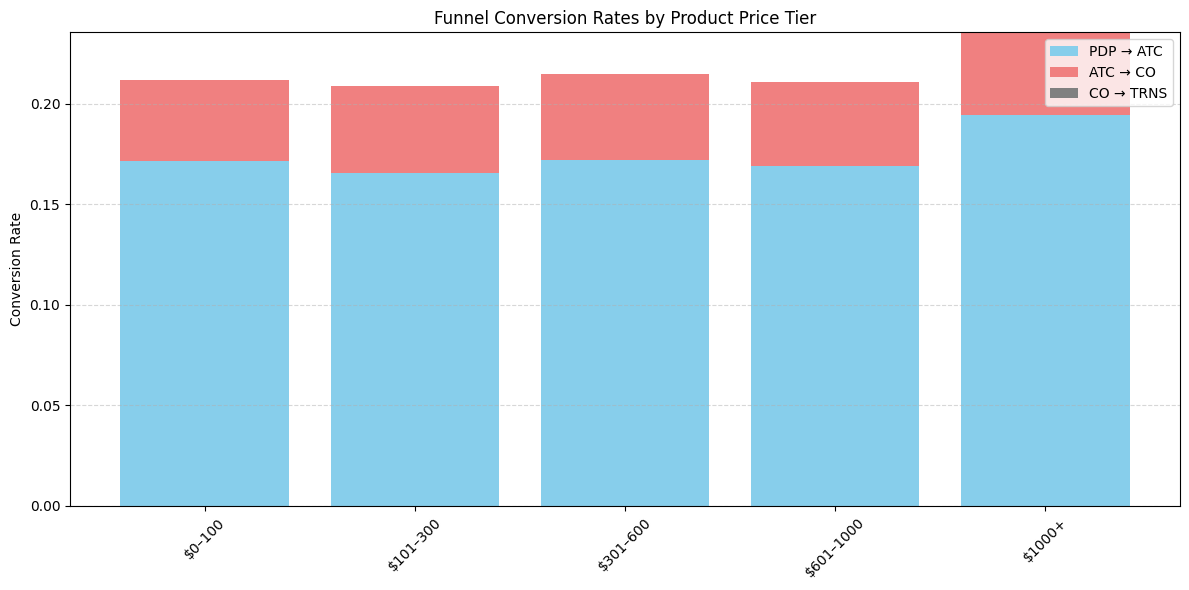

In [25]:
# Set position of bars
x = np.arange(len(price_summary['price_group']))

# Plot stacked bar chart
plt.figure(figsize=(12,6))
plt.bar(x, price_summary['pdp_to_atc'], label='PDP → ATC', color='skyblue')
plt.bar(x, price_summary['atc_to_co'], bottom=price_summary['pdp_to_atc'], label='ATC → CO', color='lightcoral')
plt.bar(x, price_summary['co_to_trns'], bottom=price_summary['pdp_to_atc'] + price_summary['atc_to_co'], label='CO → TRNS', color='gray')

# Labels and formatting
plt.xticks(x, price_summary['price_group'], rotation=45)
plt.ylabel('Conversion Rate')
plt.title('Funnel Conversion Rates by Product Price Tier')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Conclusion:**
1. Over 11,000 products have high interest but zero revenue, with significant marketing exposure.
2. The funnel fails at checkout (0% CO → TRNS).
3. This is not a pricing issue — even high-priced products convert well up to cart.
Fixing checkout UX and trust issues is key to recovering this lost revenue.



**Recommendations**
1. Fix Checkout Barriers:
Run QA tests to detect broken checkout flows
Reduce cart friction: simplify checkout, allow guest checkout
Show trust badges, flexible return policies, payment security
2. Retarget Interested Customers:
Use abandoned cart email/SMS retargeting
Offer limited-time discounts or free shipping
3. Review Campaign Messaging:
Ensure ads accurately reflect the product — avoid misleading expectations
Align landing page content with user intent.

###3) Check Conversion Drop-Off Points for High-priced Products

**Goal: Identify expensive products that attract attention but lose customers before purchase.**





In [17]:
# Set high-price threshold (top 25%)
high_price_threshold = ecom_data['product_price'].quantile(0.75)

# Filter high-priced products
high_priced_products = ecom_data[ecom_data['product_price'] >= high_price_threshold].copy()


In [18]:
# Filter products with high PDP but poor conversion somewhere in the funnel
high_price_dropoffs = high_priced_products[
    (high_priced_products['pdp'] > 0) & (
        (high_priced_products['pdp_to_atc'] < 0.2) |   # low add-to-cart rate
        (high_priced_products['atc_to_co'] < 0.1) |    # cart abandonment
        (high_priced_products['co_to_trns'] < 0.1)     # checkout abandonment
    )
].copy()


In [22]:
columns_to_display = [
    'product_name', 'product_category', 'product_price',
    'pdp', 'atc', 'co', 'trns',
    'pdp_to_atc', 'atc_to_co', 'co_to_trns'
]

# Sort by product price descending
high_price_dropoffs_sorted = high_price_dropoffs.sort_values(by='product_price', ascending=False)

# Show top 20
high_price_dropoffs_sorted[columns_to_display].head(30)


,product_name,product_category,product_price,pdp,atc,co,trns,pdp_to_atc,atc_to_co,co_to_trns
9944,Osprey Wild Pathfinder Ultimate bike,bike,4498,1,0,0,0,0.0,0.0,0.0
28049,Osprey Wild Pathfinder Ultimate bike,bike,4498,1,0,0,0,0.0,0.0,0.0
20257,Osprey Wild Pathfinder Ultimate bike,bike,4498,1,0,0,0,0.0,0.0,0.0
15074,Osprey Wild Pathfinder Ultimate bike,bike,4498,1,0,0,0,0.0,0.0,0.0
16582,Osprey Wild Pathfinder Ultimate bike,bike,4498,1,0,0,0,0.0,0.0,0.0
8987,Osprey Wild Pathfinder Ultimate bike,bike,4498,1,0,0,0,0.0,0.0,0.0
15868,Osprey River Runner Versatile bike,bike,4440,1,0,0,0,0.0,0.0,0.0
22657,Osprey River Runner Versatile bike,bike,4440,1,0,0,0,0.0,0.0,0.0
26457,Osprey River Runner Versatile bike,bike,4440,1,0,0,0,0.0,0.0,0.0
23919,Osprey River Runner Versatile bike,bike,4440,1,0,0,0,0.0,0.0,0.0


Insights:
1.   These high-priced products completely fail to engage the customer after the first view. There's a complete funnel breakdown — not even a cart add.
2.   Osprey Wild Pathfinder Ultimate bike" (price: 4498) appears multiple times.
"Osprey River Runner Versatile bike" (price: 4440) also appears many times.
3. Price is a major barrier. High prices often require more trust signals and better value justification.
4. Since pdp > 0 for all products, this confirms:
Customers are landing on the product page.
But they are not convinced to take any next step.This is likely not a visibility issue (ads or search working), but rather a messaging, trust, or pricing issue.


In [29]:
# Filter products that are expensive, have atc or co activity, but no transactions
high_price_abandon = high_pdp_low_revenue[
    (high_pdp_low_revenue['product_price'] > 1000) &
    ((high_pdp_low_revenue['atc'] > 0) | (high_pdp_low_revenue['co'] > 0)) &
    (high_pdp_low_revenue['trns'] == 0)
]

# Group by product_name and aggregate
grouped = high_price_abandon.groupby('product_name').agg({
    'product_price': 'mean',
    'pdp': 'sum',
    'atc': 'sum',
    'co': 'sum',
    'trns': 'sum'
}).reset_index()

# Calculate funnel rates
grouped['pdp_to_atc'] = grouped['atc'] / grouped['pdp']
grouped['atc_to_co'] = grouped['co'] / grouped['atc'].replace(0, np.nan)
grouped['co_to_trns'] = grouped['trns'] / grouped['co'].replace(0, np.nan)

# Fill NaNs with 0
grouped.fillna(0, inplace=True)

# Sort by product_price descending (top expensive products)
top_high_price_abandon = grouped.sort_values(by='product_price', ascending=False).head(10)




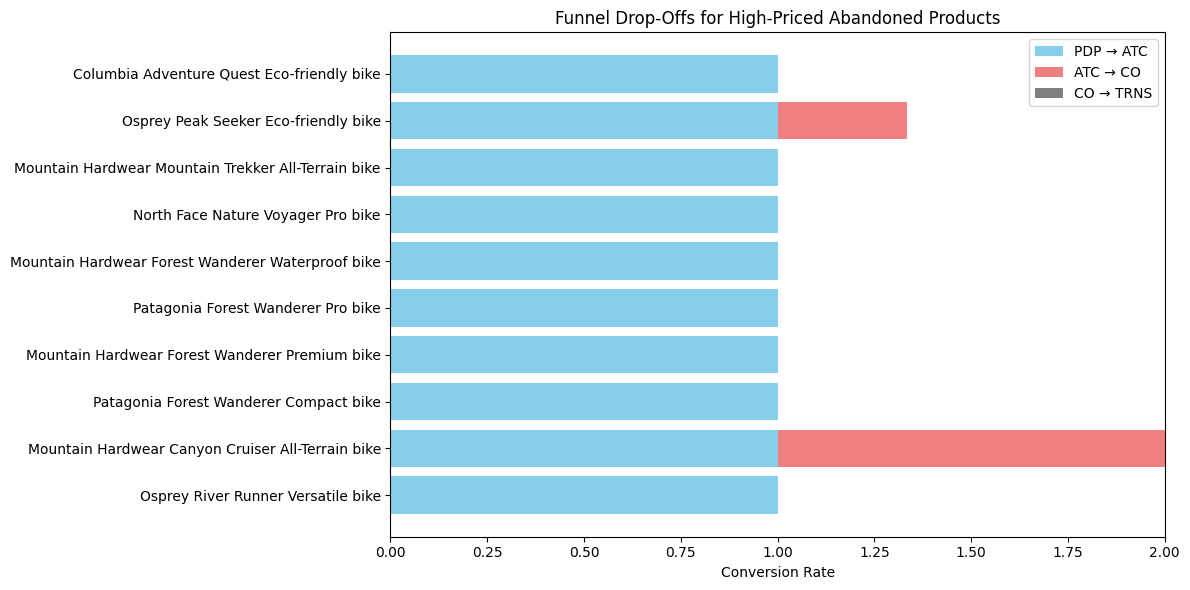

In [30]:
# Set up plot data
product_names = top_high_price_abandon['product_name']
pdp_to_atc = top_high_price_abandon['pdp_to_atc']
atc_to_co = top_high_price_abandon['atc_to_co']
co_to_trns = top_high_price_abandon['co_to_trns']

# Plot
plt.figure(figsize=(12, 6))
bar1 = plt.barh(product_names, pdp_to_atc, color='skyblue', label='PDP → ATC')
bar2 = plt.barh(product_names, atc_to_co, left=pdp_to_atc, color='lightcoral', label='ATC → CO')
bar3 = plt.barh(product_names, co_to_trns, left=pdp_to_atc + atc_to_co, color='gray', label='CO → TRNS')

plt.xlabel('Conversion Rate')
plt.title('Funnel Drop-Offs for High-Priced Abandoned Products')
plt.legend()
plt.tight_layout()
plt.show()


Recommendations:
1.   Audit product listing duplication — too many similar listings can dilute customer interest.

2.   Consider consolidating listings or clearly differentiating variations (e.g., better titles or filters).
3. Enhance product detail pages (PDP) with:
Videos, customer testimonials, expert reviews;
Financing options (Buy Now, Pay Later);
Price comparisons to competitors;
Add urgency triggers: limited stock, exclusive offers, promotions.
4. A/B test different product descriptions and CTAs.
Highlight benefits (e.g., “Best for serious trail riders”).
Offer chat support or Q&A on PDP to address objections.


